In [1]:
from pynq import Overlay
ol = Overlay ('Audio_Effect_Box.bit')
ol.download()

In [2]:
from pynq import Clocks
print ("The CPU Clock is at " + str(Clocks.cpu_mhz) + "MHz")
print ("The PL Clock 0 is at " + str(Clocks.fclk0_mhz) + "MHz")
print ("The PL Clock 1 is at " + str(Clocks.fclk1_mhz) + "MHz")
print ("The PL Clock 2 is at " + str(Clocks.fclk2_mhz) + "MHz")
print ("The PL Clock 3 is at " + str(Clocks.fclk3_mhz) + "MHz")

#CHANGE CLOCK FREQUENCY
#   Clocks.{name} = {frequency}

The CPU Clock is at 650.0MHz
The PL Clock 0 is at 100.0MHz
The PL Clock 1 is at 50.0MHz
The PL Clock 2 is at 100.0MHz
The PL Clock 3 is at 100.0MHz


# IP ADDRESS
<img src="Images/IP_ADDRESS.PNG" width="400">

In [3]:
from pynq import MMIO
#I2S Receiver
IP_BASE_ADDRESS = 0x43C00000
ADDRESS_RANGE = 0x10000
mmio = MMIO(IP_BASE_ADDRESS,ADDRESS_RANGE,debug=True)
#Control Register
mmio.write_mm(0x08, 0x1)
#I2S Timing Control
mmio.write_mm(0x20, 0xA)

MMIO Debug: MMIO(address, size) = (43c00000, 10000 bytes).
MMIO Debug: Writing 4 bytes to offset 8: 1
MMIO Debug: Writing 4 bytes to offset 20: a


In [4]:
#I2S Transmitter
IP_BASE_ADDRESS = 0x43C10000
ADDRESS_RANGE = 0x10000
mmio = MMIO(IP_BASE_ADDRESS,ADDRESS_RANGE,debug=True)
#Control Register
mmio.write_mm(0x08, 0x1)
#I2S Timing Control
mmio.write_mm(0x20, 0xA)

MMIO Debug: MMIO(address, size) = (43c10000, 10000 bytes).
MMIO Debug: Writing 4 bytes to offset 8: 1
MMIO Debug: Writing 4 bytes to offset 20: a


# AxiICC librairy
## Send i2c
<blockquote>
<code>send(self, address, data, length, option=0)</code><br>
Send data to an attached IIC slave<br>
**Parameters**<br>
address : int<br>
    &emsp;Address is the address of the IIC peripheral<br>
data : bytes-like<br>
    &emsp;Data is an array of bytes to be sent to the IP<br>
length : int<br>
    &emsp;Length is the number of bytes to be transferred<br>
option : int<br>
    &emsp;Optionally REPEAT_START to keep hold of the bus between transactions<br>
</blockquote>

## Receive i2c
<blockquote>
<code>receive(self, address, data, length, option=0)</code><br>
Receive data from an attached IIC slave<br>
**Parameters**<br>

address : int<br>
    &emsp;Address is the address of the IIC peripheral<br>
data : bytes-like<br>
    &emsp;Data is an array of bytes to receive data from the IP<br>
length : int<br>
    &emsp;Length is the number of bytes to be received<br>
option : int<br>
    &emsp;Optionally REPEAT_START to keep hold of the bus between transactions<br>
</blockquote>
# I²C for the ADAU1761
<img src="Images/ADAU_I2C.PNG" width="800">
# ADAU1761 Device Address
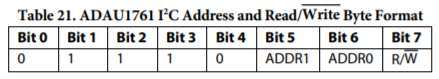
Where ADDR0 & ADDR1 are by default pull-up (default bit = 1).<br>
The address of the device is **0x3B**.

In [5]:
def create_data (register,data):
    hex40 = 0x40
    return [hex40,register,data]

In [11]:
from pynq.lib.iic import AxiIIC
import time
axiiic_ip = ol.ip_dict['axi_iic_0']
i2c = AxiIIC(axiiic_ip)

#Enable Clock core
i2c.send(0x3B,create_data(0x00,0x07),3)
#Configure Serial port
i2c.send(0x3B,create_data(0x16,0x40),3)
#Enable Mixer 1
i2c.send(0x3B,create_data(0x0A,0x01),3)
#Set Left AUX gain to 6dB
i2c.send(0x3B,create_data(0x0B,0x07),3)
#Enable Mixer 2
i2c.send(0x3B,create_data(0x0C,0x01),3)
#Set Right AUX gain to 6dB
i2c.send(0x3B,create_data(0x0D,0x07),3)
#Enable both ADCs
i2c.send(0x3B,create_data(0x19,0x03),3)
#Enable Noise Gate
i2c.send(0x3B,create_data(0x14,0x20),3)
#Playback left mixer unmute, enable
i2c.send(0x3B,create_data(0x1C,0x21),3)
#Playback right mixer unmute, enable
i2c.send(0x3B,create_data(0x1E,0x41),3)
#Enable headphone output left to max
i2c.send(0x3B,create_data(0x23,0xFF),3)
#Enable headphone output right to max
i2c.send(0x3B,create_data(0x24,0xFF),3)
#Enable both DACs
i2c.send(0x3B,create_data(0x2A,0x03),3)
#HP+MIC Enable
i2c.send(0x3B,create_data(0x29,0x03),3)
#Serial input L0,R0 to DAC L,R (Route Serial in)
i2c.send(0x3B,create_data(0xF2,0x01),3)
#Serial output ADC L,R to serial output L0,R0 (Route Serial out)
i2c.send(0x3B,create_data(0xF3,0x01),3)
#Disable dejitter
i2c.send(0x3B,create_data(0x36,0x00),3)
#Enable clocks to all engines
i2c.send(0x3B,create_data(0xF9,0x7F),3)
#Enable both clock generators
i2c.send(0x3B,create_data(0xFA,0x03),3)

3

In [7]:
#Enable/Disable all effects


In [8]:
#Enable LEDs for the effects

In [9]:
#Clock off
i2c.send(0x4000,0xE,1,0)
#Configure PLL
i2c.send(0x4002,0x7D000C2301,6,0)
#Wait for PPL to lock
data = 0;
while (data != 2) :
    i2c.receive(0x4002,data,6,0)

OverflowError: integer 16384 does not fit 'unsigned char'